# Machine Learning Data Processing

In [1]:
# ! pip install keras_tuner
import pandas as pd
import numpy as np
import pandas as pd

from sklearn.linear_model import LogisticRegression
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn import metrics
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
# Dependencies
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
#import tensorflow as tf
#import keras_tuner as kt
from sklearn.pipeline import Pipeline
#from keras.layers import Dense, Dropout, Flatten, Activation
import h5py
from sklearn.model_selection import cross_validate
from sklearn.metrics import f1_score

In [2]:
f = './Resources/machine11_data.csv'
final1_df = pd.read_csv(f)
final1_df.head(2)

,Date,course,band,Distance,Track_condition,season,race_group,race_type,Race_Money,trainer,jockey,Track_position,age,Weight,gear,Top_speed,Winner,prize_money
0,2005-06-02,other,other,3200,other,5,Hurdle,Handicap,11568.0,other,other,3.0,5,157,t,93.0,0,852.0
1,2005-06-02,other,other,3200,other,5,Hurdle,Handicap,11568.0,other,other,5.0,4,150,t,79.0,0,0.0


In [3]:
final1_df.shape

(140461, 18)

In [4]:
import datetime

In [5]:
final1_df['Date']= pd.to_datetime(final1_df['Date'])
final1_df.head(2)

,Date,course,band,Distance,Track_condition,season,race_group,race_type,Race_Money,trainer,jockey,Track_position,age,Weight,gear,Top_speed,Winner,prize_money
0,2005-06-02,other,other,3200,other,5,Hurdle,Handicap,11568.0,other,other,3.0,5,157,t,93.0,0,852.0
1,2005-06-02,other,other,3200,other,5,Hurdle,Handicap,11568.0,other,other,5.0,4,150,t,79.0,0,0.0


In [6]:
#final1_df.dtypes

In [7]:
final1_df.set_index('Date').head(2)

,course,band,Distance,Track_condition,season,race_group,race_type,Race_Money,trainer,jockey,Track_position,age,Weight,gear,Top_speed,Winner,prize_money
Date,,,,,,,,,,,,,,,,,
2005-06-02,other,other,3200,other,5,Hurdle,Handicap,11568.0,other,other,3.0,5,157,t,93.0,0,852.0
2005-06-02,other,other,3200,other,5,Hurdle,Handicap,11568.0,other,other,5.0,4,150,t,79.0,0,0.0


In [8]:
#final1_df.dtypes

In [9]:
new_df = final1_df.iloc[0:120000, :]
new_df.head(2)

,Date,course,band,Distance,Track_condition,season,race_group,race_type,Race_Money,trainer,jockey,Track_position,age,Weight,gear,Top_speed,Winner,prize_money
0,2005-06-02,other,other,3200,other,5,Hurdle,Handicap,11568.0,other,other,3.0,5,157,t,93.0,0,852.0
1,2005-06-02,other,other,3200,other,5,Hurdle,Handicap,11568.0,other,other,5.0,4,150,t,79.0,0,0.0


### connect prediction with output

In [10]:
check_df = final1_df.iloc[120001:140461, :]
check_df.head(2)

,Date,course,band,Distance,Track_condition,season,race_group,race_type,Race_Money,trainer,jockey,Track_position,age,Weight,gear,Top_speed,Winner,prize_money
120001,2016-08-13,other,4yo+,4600,Good,16,Hurdle,Handicap,5589.204545,other,other,4.0,11,151,tp,7.0,0,271.022727
120002,2016-09-06,Worcester,other,3200,Good,16,Hurdle,Handicap,6930.613636,David Pipe,other,1.0,6,164,b,113.0,1,4578.136364


In [11]:
Xc = check_df.drop("Winner", 1) 
yc = check_df.Winner # target

In [12]:
Xc1 = Xc.drop(['Date'], axis=1)

In [13]:
Xc1

,course,band,Distance,Track_condition,season,race_group,race_type,Race_Money,trainer,jockey,Track_position,age,Weight,gear,Top_speed,prize_money
120001,other,4yo+,4600,Good,16,Hurdle,Handicap,5589.204545,other,other,4.0,11,151,tp,7.0,271.022727
120002,Worcester,other,3200,Good,16,Hurdle,Handicap,6930.613636,David Pipe,other,1.0,6,164,b,113.0,4578.136364
120003,Worcester,other,3200,Good,16,Hurdle,Handicap,6930.613636,other,other,2.0,5,159,t,95.0,1344.272727
120004,Worcester,other,3200,Good,16,Hurdle,Handicap,6930.613636,other,other,3.0,9,153,other,84.0,672.136364
120005,Worcester,other,3200,Good,16,Hurdle,Handicap,6930.613636,other,other,6.0,6,164,b,78.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140456,other,other,3600,Good,19,Hurdle,Handicap,7094.090909,other,other,11.0,6,156,p,66.0,0.000000
140457,other,other,3600,Good,19,Hurdle,Handicap,7094.090909,other,other,13.0,5,161,p,58.0,0.000000
140458,other,other,3600,Good,19,Hurdle,Handicap,7094.090909,other,other,14.0,7,161,tp,30.0,0.000000
140459,other,4yo+,4400,Good,19,Hurdle,Even,5731.363636,other,other,1.0,6,152,p,79.0,4430.454545


In [14]:
yc

120001    0
120002    1
120003    0
120004    0
120005    0
         ..
140456    0
140457    0
140458    0
140459    1
140460    0
Name: Winner, Length: 20460, dtype: int64

## End

In [15]:
cleaned_df = new_df.drop(['Date'], axis=1)

cleaned_df.head(2)

,course,band,Distance,Track_condition,season,race_group,race_type,Race_Money,trainer,jockey,Track_position,age,Weight,gear,Top_speed,Winner,prize_money
0,other,other,3200,other,5,Hurdle,Handicap,11568.0,other,other,3.0,5,157,t,93.0,0,852.0
1,other,other,3200,other,5,Hurdle,Handicap,11568.0,other,other,5.0,4,150,t,79.0,0,0.0


In [16]:
cleaned_positive = cleaned_df[cleaned_df['Winner']==1]
cleaned_positive.head(2)

,course,band,Distance,Track_condition,season,race_group,race_type,Race_Money,trainer,jockey,Track_position,age,Weight,gear,Top_speed,Winner,prize_money
3,other,other,3200,other,5,Hurdle,Handicap,12532.0,other,other,1.0,4,161,t,33.0,1,8983.0
11,other,4yo+,4000,Soft,5,Hurdle,Handicap,14460.0,other,other,1.0,4,156,b,83.0,1,10365.0


In [17]:
cleaned_neg = cleaned_df[cleaned_df['Winner']==0].sample(n=len(cleaned_positive))
cleaned_neg.head(2)

,course,band,Distance,Track_condition,season,race_group,race_type,Race_Money,trainer,jockey,Track_position,age,Weight,gear,Top_speed,Winner,prize_money
25469,other,5yo+,4500,Good,14,Chase,Even,22560.0,other,other,8.0,9,154,tp,120.0,0,0.0
24332,other,4yo+,3200,other,14,Hurdle,Handicap,9600.0,Gordon Elliott,other,6.0,6,166,other,53.0,0,0.0


In [18]:
clean_df = pd.concat([cleaned_positive,cleaned_neg], axis=0)
clean_df.head(2)

,course,band,Distance,Track_condition,season,race_group,race_type,Race_Money,trainer,jockey,Track_position,age,Weight,gear,Top_speed,Winner,prize_money
3,other,other,3200,other,5,Hurdle,Handicap,12532.0,other,other,1.0,4,161,t,33.0,1,8983.0
11,other,4yo+,4000,Soft,5,Hurdle,Handicap,14460.0,other,other,1.0,4,156,b,83.0,1,10365.0


In [19]:
clean_df.shape

(31280, 17)

In [20]:
# Assign X as dataframe of the features and y as a series of the outcome variable
X = clean_df.drop("Winner", 1) 
y = clean_df.Winner # target

In [21]:
X.shape

(31280, 16)

In [22]:
y.head(2)

3     1
11    1
Name: Winner, dtype: int64

In [23]:
X.shape

(31280, 16)

In [24]:
y.shape

(31280,)

In [25]:
X.head(2)

,course,band,Distance,Track_condition,season,race_group,race_type,Race_Money,trainer,jockey,Track_position,age,Weight,gear,Top_speed,prize_money
3,other,other,3200,other,5,Hurdle,Handicap,12532.0,other,other,1.0,4,161,t,33.0,8983.0
11,other,4yo+,4000,Soft,5,Hurdle,Handicap,14460.0,other,other,1.0,4,156,b,83.0,10365.0


In [26]:
len(X.columns)

16

In [27]:
X_= X.drop(['band','season'],axis=1)

In [28]:
X_

,course,Distance,Track_condition,race_group,race_type,Race_Money,trainer,jockey,Track_position,age,Weight,gear,Top_speed,prize_money
3,other,3200,other,Hurdle,Handicap,12532.000000,other,other,1.0,4,161,t,33.0,8983.000000
11,other,4000,Soft,Hurdle,Handicap,14460.000000,other,other,1.0,4,156,b,83.0,10365.000000
19,other,3200,Soft,Hurdle,Handicap,12050.000000,other,other,1.0,8,150,b,45.0,8637.500000
24,other,4000,Soft,Hurdle,Handicap,12050.000000,other,other,1.0,6,145,t,44.0,8637.500000
29,other,4600,other,Chase,Even,7712.000000,other,other,1.0,9,154,t,103.0,5528.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42060,other,3300,Good,Hurdle,Handicap,16082.000000,other,other,13.0,7,164,other,87.0,0.000000
98327,other,3900,Soft,Hurdle,Handicap,4471.363636,other,other,4.0,7,160,t,62.0,216.818182
20625,other,3200,other,Hurdle,Handicap,6720.000000,other,other,7.0,6,157,t,90.0,0.000000
9879,other,3800,other,Chase,Handicap,8676.000000,other,other,6.0,6,159,p,59.0,0.000000


In [29]:
# Print object variable column
# Print object variable column
for col_name in X_.columns:
    if X_[col_name].dtypes == 'object':
        unique_cat = len(X_[col_name].unique())
        print("Feature '{col_name}' has {unique_cat} unique categories".format(col_name=col_name, unique_cat=unique_cat))

Feature 'course' has 5 unique categories
Feature 'Track_condition' has 4 unique categories
Feature 'race_group' has 4 unique categories
Feature 'race_type' has 2 unique categories
Feature 'trainer' has 3 unique categories
Feature 'jockey' has 3 unique categories
Feature 'gear' has 5 unique categories


In [30]:
# assign labels denoted by y to our train and test data sets
y_label = LabelEncoder().fit_transform(clean_df["Winner"])
y_label

array([1, 1, 1, ..., 0, 0, 0], dtype=int64)

<AxesSubplot:>

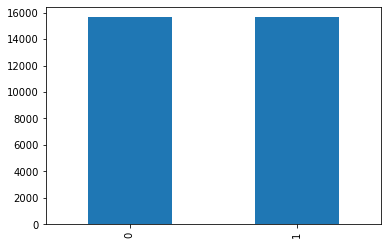

In [31]:
clean_df["Winner"].value_counts().plot(kind="bar")

In [32]:
# get_dummies for train data
X_dum = pd.get_dummies((X_), drop_first=True)
X_dum.head(2)

,Distance,Race_Money,Track_position,age,Weight,Top_speed,prize_money,course_Fontwell,course_Uttoxeter,course_Worcester,...,race_group_Unknown,race_type_Handicap,trainer_Gordon Elliott,trainer_other,jockey_Tom Scudamore,jockey_other,gear_other,gear_p,gear_t,gear_tp
3,3200,12532.0,1.0,4,161,33.0,8983.0,0,0,0,...,0,1,0,1,0,1,0,0,1,0
11,4000,14460.0,1.0,4,156,83.0,10365.0,0,0,0,...,0,1,0,1,0,1,0,0,0,0


In [33]:
X_dum.columns

Index(['Distance', 'Race_Money', 'Track_position', 'age', 'Weight',
       'Top_speed', 'prize_money', 'course_Fontwell', 'course_Uttoxeter',
       'course_Worcester', 'course_other', 'Track_condition_Good To Soft',
       'Track_condition_Soft', 'Track_condition_other', 'race_group_Chase',
       'race_group_Hurdle', 'race_group_Unknown', 'race_type_Handicap',
       'trainer_Gordon Elliott', 'trainer_other', 'jockey_Tom Scudamore',
       'jockey_other', 'gear_other', 'gear_p', 'gear_t', 'gear_tp'],
      dtype='object')

In [34]:
X_dum.nunique()

Distance                          43
Race_Money                      2002
Track_position                    24
age                               14
Weight                            49
Top_speed                        172
prize_money                     3561
course_Fontwell                    2
course_Uttoxeter                   2
course_Worcester                   2
course_other                       2
Track_condition_Good To Soft       2
Track_condition_Soft               2
Track_condition_other              2
race_group_Chase                   2
race_group_Hurdle                  2
race_group_Unknown                 2
race_type_Handicap                 2
trainer_Gordon Elliott             2
trainer_other                      2
jockey_Tom Scudamore               2
jockey_other                       2
gear_other                         2
gear_p                             2
gear_t                             2
gear_tp                            2
dtype: int64

# Machine Learning Model

In [35]:
X_dum.head(2)

,Distance,Race_Money,Track_position,age,Weight,Top_speed,prize_money,course_Fontwell,course_Uttoxeter,course_Worcester,...,race_group_Unknown,race_type_Handicap,trainer_Gordon Elliott,trainer_other,jockey_Tom Scudamore,jockey_other,gear_other,gear_p,gear_t,gear_tp
3,3200,12532.0,1.0,4,161,33.0,8983.0,0,0,0,...,0,1,0,1,0,1,0,0,1,0
11,4000,14460.0,1.0,4,156,83.0,10365.0,0,0,0,...,0,1,0,1,0,1,0,0,0,0


In [36]:
from collections import Counter
counter = Counter(y)
for k, v in counter.items():
  dist = v/ len(y)*100
  print(f"Class={k}, n={v} ({dist}%)")

Class=1, n=15640 (50.0%)
Class=0, n=15640 (50.0%)


<BarContainer object of 2 artists>

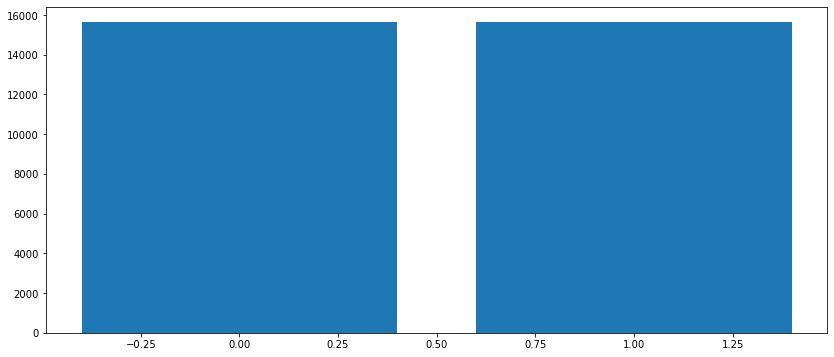

In [37]:
plt.figure(1, figsize=(14,6))
plt.bar(counter.keys(),counter.values())

In [38]:
y_label

array([1, 1, 1, ..., 0, 0, 0], dtype=int64)

In [39]:
X_dum.head(20)

,Distance,Race_Money,Track_position,age,Weight,Top_speed,prize_money,course_Fontwell,course_Uttoxeter,course_Worcester,...,race_group_Unknown,race_type_Handicap,trainer_Gordon Elliott,trainer_other,jockey_Tom Scudamore,jockey_other,gear_other,gear_p,gear_t,gear_tp
3,3200,12532.0,1.0,4,161,33.0,8983.0,0,0,0,...,0,1,0,1,0,1,0,0,1,0
11,4000,14460.0,1.0,4,156,83.0,10365.0,0,0,0,...,0,1,0,1,0,1,0,0,0,0
19,3200,12050.0,1.0,8,150,45.0,8637.5,0,0,0,...,0,1,0,1,0,1,0,0,0,0
24,4000,12050.0,1.0,6,145,44.0,8637.5,0,0,0,...,0,1,0,1,0,1,0,0,1,0
29,4600,7712.0,1.0,9,154,103.0,5528.0,0,0,0,...,0,0,0,1,0,1,0,0,1,0
31,3200,11568.0,1.0,6,163,78.0,8292.0,0,0,0,...,0,1,0,1,0,1,0,0,1,0
34,4000,12050.0,1.0,4,147,76.0,8637.5,0,0,0,...,0,1,0,1,0,1,0,0,0,0
36,3200,12050.0,1.0,11,163,108.0,8637.5,0,0,0,...,0,1,0,1,0,1,0,0,1,0
39,3800,7712.0,1.0,7,157,78.0,5528.0,0,0,0,...,0,1,0,1,0,1,0,0,1,0
46,3200,17834.0,1.0,7,149,110.0,12783.5,0,0,0,...,0,1,0,1,0,1,0,0,0,0


In [40]:
result = X_dum.iloc[3].to_list()
result

[4000.0,
 12050.0,
 1.0,
 6.0,
 145.0,
 44.0,
 8637.5,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 1.0,
 0.0,
 1.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0]

In [41]:
results = X_dum.iloc[19].to_list()
results

[4000.0,
 28920.0,
 1.0,
 4.0,
 144.0,
 48.0,
 19530.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 1.0,
 0.0,
 1.0,
 0.0,
 1.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0]

In [42]:
len(X_dum.columns)

26

In [43]:
X_dum.columns.values.tolist()

['Distance',
 'Race_Money',
 'Track_position',
 'age',
 'Weight',
 'Top_speed',
 'prize_money',
 'course_Fontwell',
 'course_Uttoxeter',
 'course_Worcester',
 'course_other',
 'Track_condition_Good To Soft',
 'Track_condition_Soft',
 'Track_condition_other',
 'race_group_Chase',
 'race_group_Hurdle',
 'race_group_Unknown',
 'race_type_Handicap',
 'trainer_Gordon Elliott',
 'trainer_other',
 'jockey_Tom Scudamore',
 'jockey_other',
 'gear_other',
 'gear_p',
 'gear_t',
 'gear_tp']

In [44]:
# Use sklearn to split dataset
# Use sklearn to split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X_dum, y_label, train_size = 0.6, random_state=1)

In [45]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [46]:
X_train_scaled

array([[ 1.21906218, -0.32230223,  0.80895994, ...,  1.68814874,
        -0.73768759, -0.27695203],
       [ 1.21906218, -0.24355757, -0.71127238, ..., -0.59236487,
        -0.73768759, -0.27695203],
       [-1.13234708, -0.15265851, -0.71127238, ..., -0.59236487,
         1.35558739, -0.27695203],
       ...,
       [-1.13234708, -0.24985714, -0.71127238, ..., -0.59236487,
         1.35558739, -0.27695203],
       [ 0.04335755, -0.02509936, -0.71127238, ..., -0.59236487,
        -0.73768759, -0.27695203],
       [-1.13234708,  0.17608737,  0.80895994, ..., -0.59236487,
        -0.73768759, -0.27695203]])

In [47]:
X_test_scaled

array([[-0.69145784, -0.24355757, -0.71127238, ..., -0.59236487,
         1.35558739, -0.27695203],
       [-0.2505686 , -0.1203989 , -0.71127238, ...,  1.68814874,
        -0.73768759, -0.27695203],
       [-0.69145784, -0.25913039,  0.20086701, ..., -0.59236487,
         1.35558739, -0.27695203],
       ...,
       [-1.13234708, -0.16204159, -0.71127238, ..., -0.59236487,
        -0.73768759, -0.27695203],
       [-0.985384  , -0.3286018 ,  1.41705287, ..., -0.59236487,
        -0.73768759, -0.27695203],
       [-1.13234708, -0.21524055, -0.71127238, ...,  1.68814874,
        -0.73768759, -0.27695203]])

## Logistic Regression

In [48]:
classifier = LogisticRegression(fit_intercept=True, random_state=1, max_iter = 400,verbose=0, multi_class='auto')
classifier.fit(X_train_scaled,y_train)
classifier.score(X_train_scaled,y_train)
classifier.score(X_test_scaled,y_test)

0.9993606138107417

In [49]:
print(f"Training Scaled Data Score: {classifier.score(X_train_scaled,y_train)}")
print(f"Test  Scaled Data Score: {classifier.score(X_test_scaled,y_test)}")

Training Scaled Data Score: 0.9997335890878091
Test  Scaled Data Score: 0.9993606138107417


# Decision Tree Classifier

In [50]:
model = DecisionTreeClassifier()
scores = cross_validate(model, X_train_scaled,y_train, cv=6, n_jobs=-1, scoring='f1_macro')

In [51]:
scores

{'fit_time': array([0.06052041, 0.05256844, 0.05849791, 0.06251192, 0.05856252,
        0.050421  ]),
 'score_time': array([0.01009107, 0.01014996, 0.00204587, 0.008039  , 0.00203276,
        0.01010966]),
 'test_score': array([1., 1., 1., 1., 1., 1.])}

# RandomForestClassifier

In [52]:
model_r =RandomForestClassifier(n_estimators = 10, max_features='auto')

In [53]:
model_r.fit(X_train,y_train)

RandomForestClassifier(n_estimators=10)

In [54]:
model_r.score(X_train,y_train)

1.0

In [55]:
model_r.score(X_test,y_test)

1.0

In [56]:
y_predicted = model_r.predict(X_test)
y_predicted

array([1, 1, 0, ..., 1, 0, 1], dtype=int64)

In [57]:
# Optional : using confusion matrix to confirm RandomForestClassifier
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predicted )
cm

array([[6131,    0],
       [   0, 6381]], dtype=int64)

Text(69.0, 0.5, 'Truth')

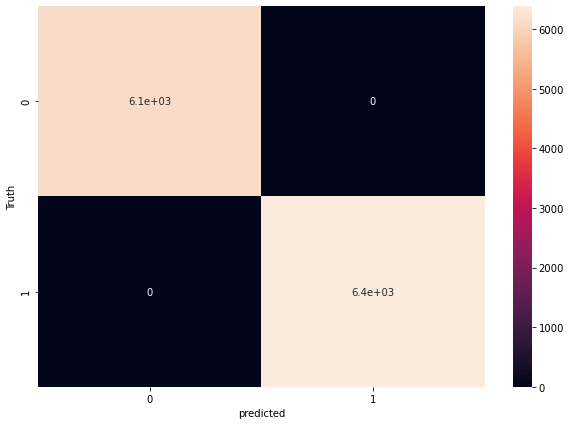

In [58]:
%matplotlib inline
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True)
plt.xlabel('predicted')
plt.ylabel('Truth')

In [59]:
y_true = y_test
tn, fp, fn, tp = confusion_matrix(y_true, y_predicted).ravel()

accuracy = (tp + tn) / (tp + fp + tn + fn)

print(f"Accuracy: {accuracy}")

Accuracy: 1.0


In [60]:
print(metrics.classification_report(y_true, y_predicted))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6131
           1       1.00      1.00      1.00      6381

    accuracy                           1.00     12512
   macro avg       1.00      1.00      1.00     12512
weighted avg       1.00      1.00      1.00     12512



Can precision and recall both be 1?
Image result for what happens when precision, recall and f1 score all gives 1
In information retrieval, a perfect precision score of 1.0 means that every result retrieved by a search was relevant (but says nothing about whether all relevant documents were retrieved) whereas a perfect recall score of 1.0 means that all relevant documents were retrieved by the search (but says nothing about how ..

In [61]:

# define input
new_input = [[4000.0,
 12050.0,
 1.0,
 6.0,
 145.0,
 44.0,
 8637.5,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 1.0,
 0.0,
 1.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0]]

In [62]:
# get prediction for new input
new_output = model_r.predict(new_input)
new_output

array([1], dtype=int64)

In [63]:
new_inputs = [[4000.0,
 28920.0,
 1.0,
 4.0,
 144.0,
 48.0,
 19530.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 1.0,
 0.0,
 1.0,
 0.0,
 1.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0]]

In [64]:
new_outputs = model_r.predict(new_inputs)
new_outputs

array([1], dtype=int64)